In [85]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [151]:
train = pd.read_csv('test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('test_and_train_installs/test_data_encoded.csv')

train2 = pd.read_csv('test_and_train_installs/train_data_encoded2.csv')
test2 = pd.read_csv('test_and_train_installs/test_data_encoded2.csv')

In [152]:
ref_hashes = train['ref_hash']
del train['ref_hash']
del test['ref_hash']

ref_hashes2 = train2['ref_hash']
del train2['ref_hash']
del test2['ref_hash']

In [153]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]

Xtest, ytest = test.iloc[:,:-1],test.iloc[:,-1]

In [154]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [155]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [156]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [157]:
preds

array([ 81433.875, 168782.   ,  85487.92 , ..., 168782.   , 168782.   ,
       168782.   ], dtype=float32)

In [158]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 89596.429130


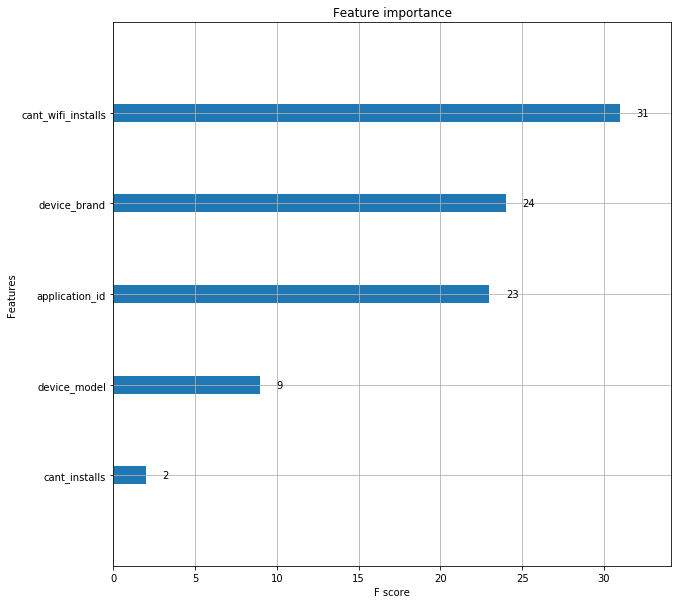

In [159]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [160]:
df = pd.DataFrame(ref_hashes)
df['predictions'] = preds
df['ytest'] = ytest
df

,ref_hash,predictions,ytest
0,1000169251625791246_sc,81433.875000,29646.1780
1,1000395625957344683_sc,168782.000000,259200.0000
2,1003027494996471685_sc,85487.921875,247044.3875
3,1006670001679961544_sc,83305.609375,4844.0530
4,1007573308966476713_sc,168782.000000,259200.0000
5,1010070503877148763_sc,168782.000000,259200.0000
6,1010265377387765028_sc,168782.000000,259200.0000
7,1010531372912327058_sc,168782.000000,259200.0000
8,1011610998357271358_sc,82777.093750,5657.6230
9,1013543838965040946_sc,168782.000000,259200.0000


In [161]:
train2['ref_hash'] = df['ref_hash']
train2['pred_18_20'] = df['predictions']
Xtrain2 = train2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytrain2 = train2[['time_to_install']]

In [162]:
test2['ref_hash'] = df['ref_hash']
test2['pred_18_20'] = df['predictions']
Xtest2 = test2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytest2 = test2[['time_to_install']]

In [163]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [164]:
# Prediccion
preds2 = xg_reg.predict(Xtest2)

In [165]:
preds2

array([169397.95, 166031.22,  91634.93, ..., 166031.22, 166031.22,
       166031.22], dtype=float32)

In [166]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

RMSE: 90824.075394


In [168]:
df = pd.DataFrame(ref_hashes)
df['predictions_18_20'] = preds
df['ytest_18_20'] = ytest
df['predictions_21_22'] = preds2
df['ytest_21_22'] = ytest2
df['preds_mean'] = (df['predictions_18_20'] + df['predictions_21_22']) / 2
df

,ref_hash,predictions_18_20,ytest_18_20,predictions_21_22,ytest_21_22,preds_mean
0,1000169251625791246_sc,81433.875000,29646.1780,169397.953125,259200.0000,125415.914062
1,1000395625957344683_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375
2,1003027494996471685_sc,85487.921875,247044.3875,91634.929688,160644.3875,88561.421875
3,1006670001679961544_sc,83305.609375,4844.0530,169397.953125,259200.0000,126351.781250
4,1007573308966476713_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375
5,1010070503877148763_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375
6,1010265377387765028_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375
7,1010531372912327058_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375
8,1011610998357271358_sc,82777.093750,5657.6230,169397.953125,259200.0000,126087.523438
9,1013543838965040946_sc,168782.000000,259200.0000,166031.218750,259200.0000,167406.609375


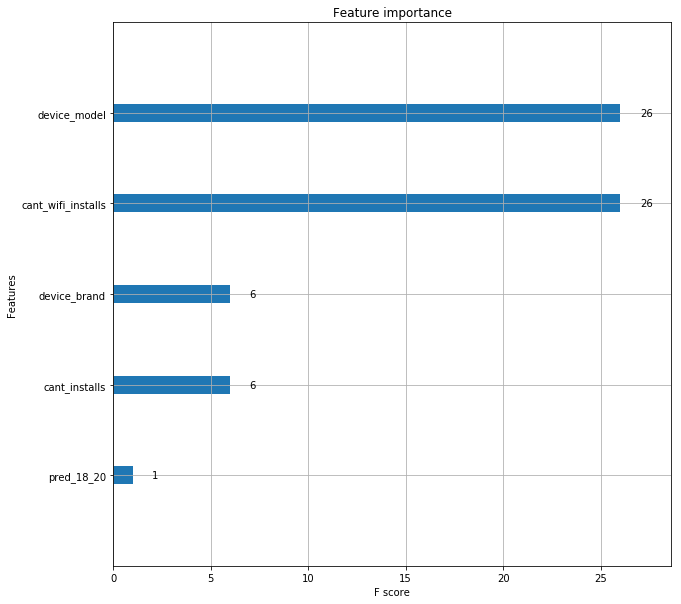

In [169]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [170]:
df2 = pd.DataFrame(ref_hashes)
df2['predictions'] = df['preds_mean']
df2.to_csv('submit_kaggle/pred_installs.csv', index=False)

In [171]:
df2

,ref_hash,predictions
0,1000169251625791246_sc,125415.914062
1,1000395625957344683_sc,167406.609375
2,1003027494996471685_sc,88561.421875
3,1006670001679961544_sc,126351.781250
4,1007573308966476713_sc,167406.609375
5,1010070503877148763_sc,167406.609375
6,1010265377387765028_sc,167406.609375
7,1010531372912327058_sc,167406.609375
8,1011610998357271358_sc,126087.523438
9,1013543838965040946_sc,167406.609375
